# Predict The Flight Ticket Price

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
print(train.shape)
print(test.shape)

(10683, 11)
(2671, 10)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
# Iterate through each column in the 'train' dataframe and print the column name along with the number of unique values it contains
for i in train.columns:
    print('Unique values in',i,train[i].nunique())

Unique values in Airline 12
Unique values in Date_of_Journey 44
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 128
Unique values in Dep_Time 222
Unique values in Arrival_Time 1343
Unique values in Duration 368
Unique values in Total_Stops 5
Unique values in Additional_Info 10
Unique values in Price 1870


In [9]:
# Iterate through each column in the 'test' dataframe and print the column name along with the number of unique values it contains
for i in test.columns:
    print('Unique values in',i,test[i].nunique())

Unique values in Airline 11
Unique values in Date_of_Journey 44
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 100
Unique values in Dep_Time 199
Unique values in Arrival_Time 704
Unique values in Duration 320
Unique values in Total_Stops 5
Unique values in Additional_Info 6


## Data Pre-processing

In [11]:
train_df = train[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 
                  'Route', 'Arrival_Time', 'Price']]

test_df = test[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 
                'Route', 'Arrival_Time']]

This is new feature Booking_Class to identify the booking class i.e. Economy, Premium Economy & Business. For the 'Premium Economy' and Business class its already mentioned. Rest of the airlines I have assumed as Economy.

In [13]:
airline_class = {'IndiGo': 'Economy',
         'GoAir': 'Economy',
         'Vistara': 'Economy',
         'Vistara Premium economy': 'Premium Economy',
         'Air Asia': 'Economy',
         'Trujet': 'Economy',
         'Jet Airways': 'Economy',
         'SpiceJet': 'Economy',
         'Jet Airways Business': 'Business',
         'Air India': 'Economy',
         'Multiple carriers': 'Economy',
         'Multiple carriers Premium economy': 'Premium Economy'}

train_df['Booking_Class']=train_df['Airline'].map(airline_class)
test_df['Booking_Class']=test_df['Airline'].map(airline_class)

In [14]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey,Dep_Time,Route,Arrival_Time,Price,Booking_Class
0,IndiGo,Banglore,New Delhi,non-stop,No info,24/03/2019,22:20,BLR → DEL,01:10 22 Mar,3897,Economy
1,Air India,Kolkata,Banglore,2 stops,No info,1/05/2019,05:50,CCU → IXR → BBI → BLR,13:15,7662,Economy
2,Jet Airways,Delhi,Cochin,2 stops,No info,9/06/2019,09:25,DEL → LKO → BOM → COK,04:25 10 Jun,13882,Economy
3,IndiGo,Kolkata,Banglore,1 stop,No info,12/05/2019,18:05,CCU → NAG → BLR,23:30,6218,Economy
4,IndiGo,Banglore,New Delhi,1 stop,No info,01/03/2019,16:50,BLR → NAG → DEL,21:35,13302,Economy


One of the very important factors which influences Flight Ticket price is how soon you book the ticket. Since this information was not provided in the dataset I have assumed 01-Mar-2019 as ticket booking date and created new feature Days_to_Departure

In [16]:
df1=train_df.copy()
df1['Day_of_Booking']='1/3/2019' # Set the 'Day_of_Booking' column to a specific date
df1['Day_of_Booking']=pd.to_datetime(df1['Day_of_Booking'],format='%d/%m/%Y') # Convert the 'Day_of_Booking' column to datetime format
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'],format='%d/%m/%Y') #  Convert the 'Date_of_Journey' column to datetime format
df1['Days_to_Departure']=(df1['Date_of_Journey']-df1['Day_of_Booking']).dt.days # Calculate the number of days to departure and store it in a new column 'Days_to_Departure'
train_df['Days_to_Departure']=df1['Days_to_Departure'] # Update the 'train_df' DataFrame with the 'Days_to_Departure' values from the modified 'df1' DataFrame

In [17]:
df2=test_df.copy()
df2['Day_of_Booking']='1/3/2019' # Set the 'Day_of_Booking' column to a specific date
df2['Day_of_Booking']=pd.to_datetime(df2['Day_of_Booking'],format='%d/%m/%Y') # Convert the 'Day_of_Booking' column to datetime format
df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'],format='%d/%m/%Y') #  Convert the 'Date_of_Journey' column to datetime format
df2['Days_to_Departure']=(df2['Date_of_Journey']-df2['Day_of_Booking']).dt.days # Calculate the number of days to departure and store it in a new column 'Days_to_Departure'
test_df['Days_to_Departure']=df2['Days_to_Departure'] # Update the 'train_df' DataFrame with the 'Days_to_Departure' values from the modified 'df1' DataFrame

In [18]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey,Dep_Time,Route,Arrival_Time,Price,Booking_Class,Days_to_Departure
0,IndiGo,Banglore,New Delhi,non-stop,No info,24/03/2019,22:20,BLR → DEL,01:10 22 Mar,3897,Economy,23
1,Air India,Kolkata,Banglore,2 stops,No info,1/05/2019,05:50,CCU → IXR → BBI → BLR,13:15,7662,Economy,61


In the column ‘Arrival_Time’,if we see we have combination of both time and month but we need only the time details out of it.

In [20]:
# Extracting the date part from the 'Arrival_Time' column and assigning it to a new column 'Arrival_Time' in the train_df dataframe
train_df['Arrival_Time']=train['Arrival_Time'].str.split(' ').str[0]
test_df['Arrival_Time']=test['Arrival_Time'].str.split(' ').str[0]

In [21]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey,Dep_Time,Route,Arrival_Time,Price,Booking_Class,Days_to_Departure
0,IndiGo,Banglore,New Delhi,non-stop,No info,24/03/2019,22:20,BLR → DEL,01:10,3897,Economy,23
1,Air India,Kolkata,Banglore,2 stops,No info,1/05/2019,05:50,CCU → IXR → BBI → BLR,13:15,7662,Economy,61


Another important parameter which influences Flight Price is Departure time of the flight i.e. Morning, Noon, Evening or Night. So created this new feature Dep_daytime which indicate Departure Time of the day. 

In [23]:
def get_departure(dep):
    dep=dep.split(':') # Split the departure time by ':' and convert the hour part to an integer
     # Determine the time of day based on the departure hour
    dep=int(dep[0])
    if(dep>=6 and dep<12):
        return 'Morning'
    elif(dep>=12 and dep<17):
        return 'Noon'
    elif(dep>=17 and dep<20):
        return 'Evening'
    else:
        return 'Night'

train_df['Dep_daytime']=train['Dep_Time'].apply(get_departure)
test_df['Dep_daytime']=test['Dep_Time'].apply(get_departure)

In [24]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey,Dep_Time,Route,Arrival_Time,Price,Booking_Class,Days_to_Departure,Dep_daytime
0,IndiGo,Banglore,New Delhi,non-stop,No info,24/03/2019,22:20,BLR → DEL,01:10,3897,Economy,23,Night
1,Air India,Kolkata,Banglore,2 stops,No info,1/05/2019,05:50,CCU → IXR → BBI → BLR,13:15,7662,Economy,61,Night


Applied the same concepts of Dep_daytime to Arrival Time and created another feature Arr_daytime

In [26]:
train_df['Arr_daytime']=train['Arrival_Time'].apply(get_departure)
test_df['Arr_daytime']=test['Arrival_Time'].apply(get_departure)

In [27]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey,Dep_Time,Route,Arrival_Time,Price,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime
0,IndiGo,Banglore,New Delhi,non-stop,No info,24/03/2019,22:20,BLR → DEL,01:10,3897,Economy,23,Night,Night
1,Air India,Kolkata,Banglore,2 stops,No info,1/05/2019,05:50,CCU → IXR → BBI → BLR,13:15,7662,Economy,61,Night,Noon


From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [29]:
train_df["Journey_day"] = pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day
train_df["Journey_month"] = pd.to_datetime(train_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

test_df["Journey_day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day
test_df["Journey_month"] = pd.to_datetime(test_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [30]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date_of_Journey,Dep_Time,Route,Arrival_Time,Price,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,non-stop,No info,24/03/2019,22:20,BLR → DEL,01:10,3897,Economy,23,Night,Night,24,3
1,Air India,Kolkata,Banglore,2 stops,No info,1/05/2019,05:50,CCU → IXR → BBI → BLR,13:15,7662,Economy,61,Night,Noon,1,5


In [31]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

Converted Total_Stops categorical column into numeric

In [33]:
train_df['Total_Stops']=train_df['Total_Stops'].str.replace('non-stop','0')
train_df['Total_Stops']=train_df['Total_Stops'].str.replace('stops',' ')
train_df['Total_Stops']=train_df['Total_Stops'].str.replace('stop',' ')
train_df['Total_Stops'].fillna(0,inplace=True)
train_df['Total_Stops']=train_df['Total_Stops'].astype(float)

In [34]:
test_df['Total_Stops']=test_df['Total_Stops'].str.replace('non-stop','0')
test_df['Total_Stops']=test_df['Total_Stops'].str.replace('stops',' ')
test_df['Total_Stops']=test_df['Total_Stops'].str.replace('stop',' ')
test_df['Total_Stops'].fillna(0,inplace=True)
test_df['Total_Stops']=test_df['Total_Stops'].astype(float)

In [35]:
test_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Dep_Time,Route,Arrival_Time,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,1.0,No info,17:30,DEL → BOM → COK,04:25,Economy,97,Evening,Night,6,6
1,IndiGo,Kolkata,Banglore,1.0,No info,06:20,CCU → MAA → BLR,10:20,Economy,72,Morning,Morning,12,5


Converted Departure column into hours and mins.

In [37]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour

# Extracting Minutes
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Extracting Hours
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [38]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route,Arrival_Time,Price,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,0.0,No info,BLR → DEL,01:10,3897,Economy,23,Night,Night,24,3,22,20
1,Air India,Kolkata,Banglore,2.0,No info,CCU → IXR → BBI → BLR,13:15,7662,Economy,61,Night,Noon,1,5,5,50


Converting Arrival time into hours and mins.

In [39]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour

# Extracting Minutes
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

# Extracting Hours
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour

# Extracting Minutes
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [40]:
test_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,1.0,No info,DEL → BOM → COK,Economy,97,Evening,Night,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,1.0,No info,CCU → MAA → BLR,Economy,72,Morning,Morning,12,5,6,20,10,20


## Handling Categorical Data

In [42]:
train_df["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

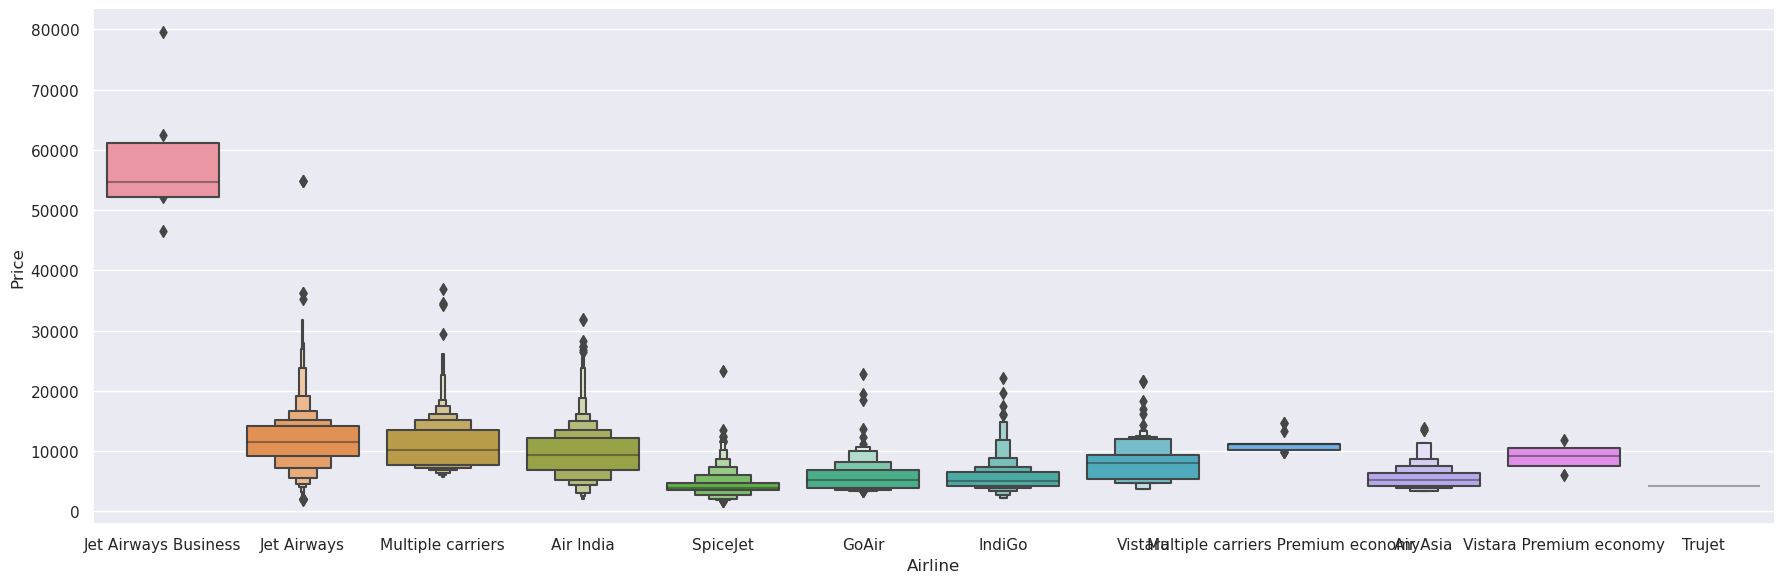

In [43]:
import seaborn as sns
sns.set()
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [44]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True).astype(int)



Airline = test_df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True).astype(int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [45]:
train_df["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

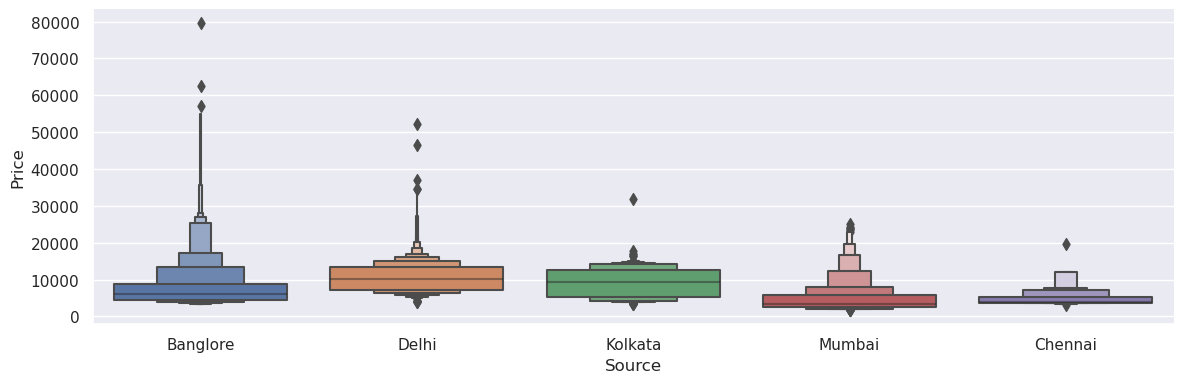

In [46]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [47]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True).astype(int)



Source = test_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True).astype(int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [48]:
train_df["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [49]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True).astype(int)



Destination = test_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True).astype(int)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [50]:
train_df["Booking_Class"].value_counts()

Booking_Class
Economy            10661
Premium Economy       16
Business               6
Name: count, dtype: int64

In [51]:
# As Booking_class is Nominal Categorical data we will perform OneHotEncoding

Booking_Class = train_df[["Booking_Class"]]

Booking_Class = pd.get_dummies(Booking_Class, drop_first = True).astype(int)



Booking_Class = test_df[["Booking_Class"]]

Booking_Class = pd.get_dummies(Booking_Class, drop_first = True).astype(int)

Booking_Class.head()

,Booking_Class_Economy,Booking_Class_Premium Economy
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [52]:
train_df["Dep_daytime"].value_counts()

Dep_daytime
Morning    4283
Night      2785
Noon       1909
Evening    1706
Name: count, dtype: int64

In [53]:
# As Dep_daytime is Nominal Categorical data we will perform OneHotEncoding

Dep_daytime = train_df[["Dep_daytime"]]

Dep_daytime = pd.get_dummies(Dep_daytime, drop_first = True).astype(int)



Dep_daytime = test_df[["Dep_daytime"]]

Dep_daytime = pd.get_dummies(Dep_daytime, drop_first = True).astype(int)

Dep_daytime.head()

,Dep_daytime_Morning,Dep_daytime_Night,Dep_daytime_Noon
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,1,0


In [54]:
train_df["Arr_daytime"].value_counts()

Arr_daytime
Night      4096
Evening    2331
Morning    2204
Noon       2052
Name: count, dtype: int64

In [55]:
# As Dep_daytime is Nominal Categorical data we will perform OneHotEncoding

Arr_daytime = train_df[["Arr_daytime"]]

Arr_daytime = pd.get_dummies(Arr_daytime, drop_first = True).astype(int)



Arr_daytime = test_df[["Arr_daytime"]]

Arr_daytime = pd.get_dummies(Arr_daytime, drop_first = True).astype(int)

Arr_daytime.head()

,Arr_daytime_Morning,Arr_daytime_Night,Arr_daytime_Noon
0,0,1,0
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0


In [56]:
train_df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [57]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [58]:
train_df["Total_Stops"].value_counts()

Total_Stops
1.0    5625
0.0    3492
2.0    1520
3.0      45
4.0       1
Name: count, dtype: int64

In [59]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [60]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0.0,3897,Economy,23,Night,Night,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2.0,7662,Economy,61,Night,Noon,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2.0,13882,Economy,100,Morning,Night,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1.0,6218,Economy,72,Evening,Night,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1.0,13302,Economy,0,Noon,Night,1,3,16,50,21,35


In [61]:
# Concatenate dataframe --> train_data + Airline + Source + Destination + Booking_Class + Dep_daytime + Arr_daytime

data_train = pd.concat([train_df, Airline, Source, Destination, Booking_Class, Dep_daytime, Arr_daytime], axis = 1)
data_test = pd.concat([test_df, Airline, Source, Destination, Booking_Class, Dep_daytime, Arr_daytime], axis = 1)

In [62]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Booking_Class,Days_to_Departure,Dep_daytime,Arr_daytime,Journey_day,...,Destination_Kolkata,Destination_New Delhi,Booking_Class_Economy,Booking_Class_Premium Economy,Dep_daytime_Morning,Dep_daytime_Night,Dep_daytime_Noon,Arr_daytime_Morning,Arr_daytime_Night,Arr_daytime_Noon
0,IndiGo,Banglore,New Delhi,0.0,3897,Economy,23,Night,Night,24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Air India,Kolkata,Banglore,2.0,7662,Economy,61,Night,Noon,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2.0,13882,Economy,100,Morning,Night,9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1.0,6218,Economy,72,Evening,Night,12,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,IndiGo,Banglore,New Delhi,1.0,13302,Economy,0,Noon,Night,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:

data_train.drop(["Airline", "Source", "Destination", "Booking_Class", "Dep_daytime", "Arr_daytime"], axis = 1, inplace = True)

data_test.drop(["Airline", "Source", "Destination", "Booking_Class", "Dep_daytime", "Arr_daytime"], axis = 1, inplace = True)

In [64]:
data_train.head()

,Total_Stops,Price,Days_to_Departure,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Destination_Kolkata,Destination_New Delhi,Booking_Class_Economy,Booking_Class_Premium Economy,Dep_daytime_Morning,Dep_daytime_Night,Dep_daytime_Noon,Arr_daytime_Morning,Arr_daytime_Night,Arr_daytime_Noon
0,0.0,3897,23,24,3,22,20,1,10,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,7662,61,1,5,5,50,13,15,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,13882,100,9,6,9,25,4,25,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6218,72,12,5,18,5,23,30,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,13302,0,1,3,16,50,21,35,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [65]:
data_train.shape

(10683, 36)

## Feature Selection

In [67]:
data_train.shape

(10683, 36)

In [68]:
data_train.columns

Index(['Total_Stops', 'Price', 'Days_to_Departure', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Booking_Class_Economy',
       'Booking_Class_Premium Economy', 'Dep_daytime_Morning',
       'Dep_daytime_Night', 'Dep_daytime_Noon', 'Arr_daytime_Morning',
       'Arr_daytime_Night', 'Arr_daytime_Noon'],
      dtype='object')

In [152]:
# Selecting specific columns from the 'data_train' dataframe to create the feature matrix X
X = data_train.loc[:, ['Total_Stops', 'Journey_day','Journey_month',
        'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Booking_Class_Economy',
       'Booking_Class_Premium Economy', 'Dep_daytime_Morning',
       'Dep_daytime_Night', 'Dep_daytime_Noon', 'Arr_daytime_Morning',
       'Arr_daytime_Night', 'Arr_daytime_Noon']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_Kolkata,Destination_New Delhi,Booking_Class_Economy,Booking_Class_Premium Economy,Dep_daytime_Morning,Dep_daytime_Night,Dep_daytime_Noon,Arr_daytime_Morning,Arr_daytime_Night,Arr_daytime_Noon
0,0.0,24,3,22,20,1,10,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,1,5,5,50,13,15,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,9,6,9,25,4,25,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,12,5,18,5,23,30,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1,3,16,50,21,35,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [154]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

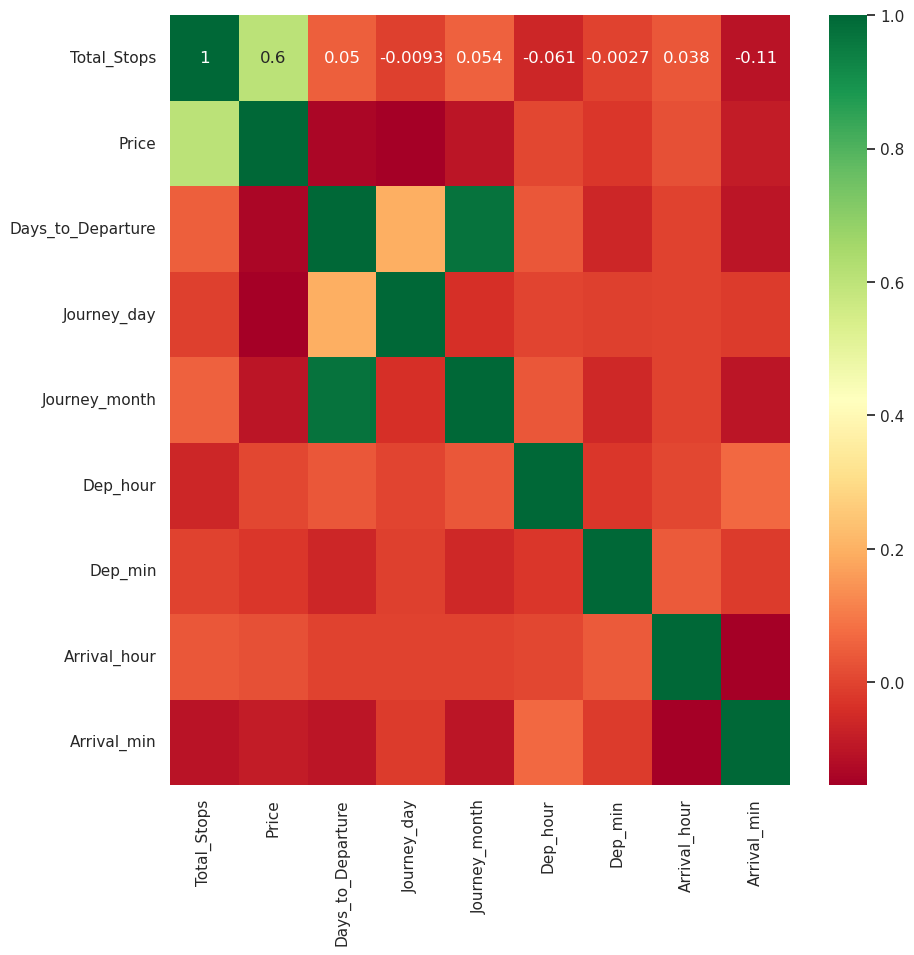

In [156]:
# Finds correlation between Independent and dependent attributes
numeric_df = train_df.select_dtypes(include=[float, int])

plt.figure(figsize = (10,10))
sns.heatmap(numeric_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Model Fitting

In [163]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets, with 80% of the data for training and 20% for testing
# Set the random_state parameter to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [177]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can also use 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

reg_rf = RandomForestRegressor() # Create a RandomForestRegressor model
reg_rf.fit(X_train_imputed, y_train) # Train the model using the imputed training data and the corresponding target values

RandomForestRegressor()

In [179]:
# Predict the target variable using the trained random forest model
y_pred = reg_rf.predict(X_test_imputed)

In [181]:
# Calculate the R^2 score of the random forest model using the training data
reg_rf.score(X_train_imputed, y_train)

0.9502647183551467

In [183]:
# Calculate the R^2 score of the trained random forest model using the imputed test data and the actual test labels
reg_rf.score(X_test_imputed, y_test)

0.7561320222684239

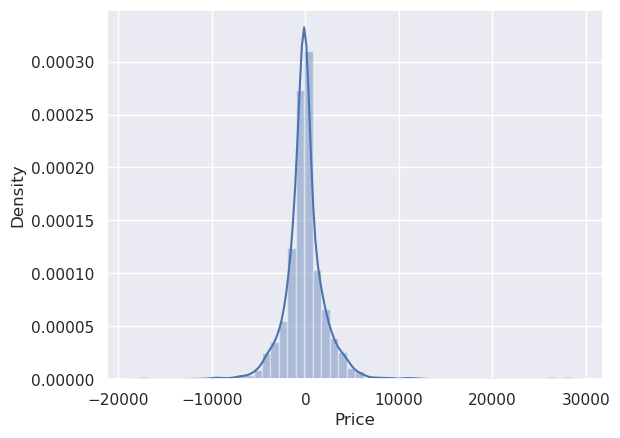

In [185]:
# Display a distribution plot of the difference between the actual y values (y_test) and the predicted y values (y_pred)
sns.distplot(y_test-y_pred)
plt.show()

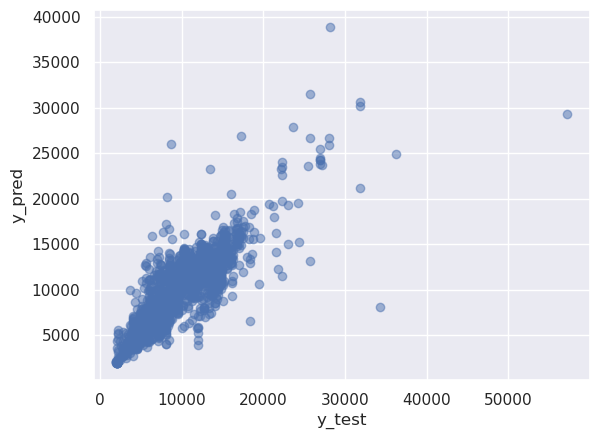

In [187]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [189]:
from sklearn import metrics

In [191]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1392.2991458427446
MSE: 5161213.602778418
RMSE: 2271.830452031669


Observation:

- MAE (Mean Absolute Error): 1392.30

This metric indicates that on average, the model's predictions are off by 1392.30 units from the actual values.

- MSE (Mean Squared Error): 5,161,213.60

MSE squares the errors before averaging, which means larger errors are penalized more heavily.
The higher value of MSE compared to MAE suggests that there are some predictions with significant errors that are having a large impact on the MSE value.

- RMSE (Root Mean Squared Error): 2271.83

An RMSE of 2271.83 indicates that the typical prediction error is around 2271.83 units.

In [193]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [195]:
# Calculate the R-squared score to evaluate the performance of the model
metrics.r2_score(y_test, y_pred)

0.7561320222684239

## Hyperparameter Tuning

In [198]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [202]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [206]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


rf_random.fit(X_train_imputed,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [208]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [212]:
prediction = rf_random.predict(X_test_imputed)

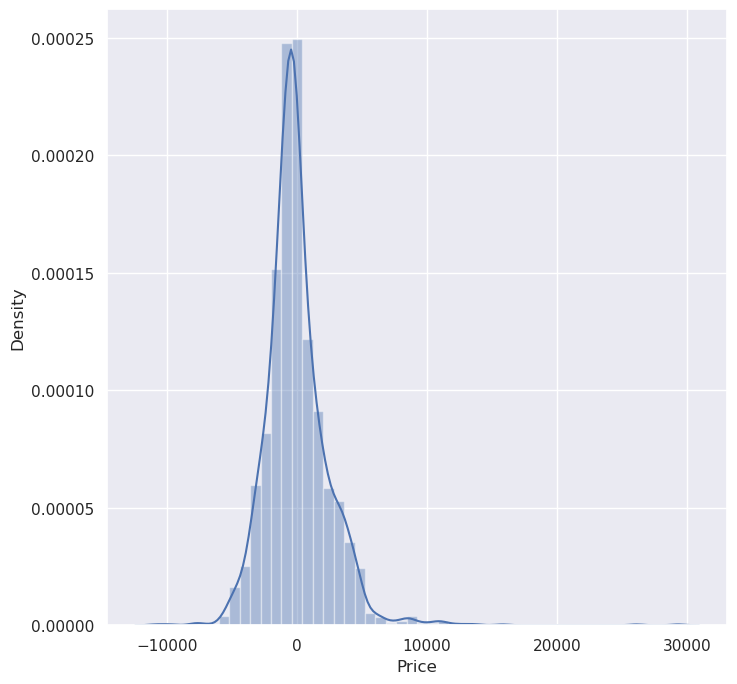

In [214]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

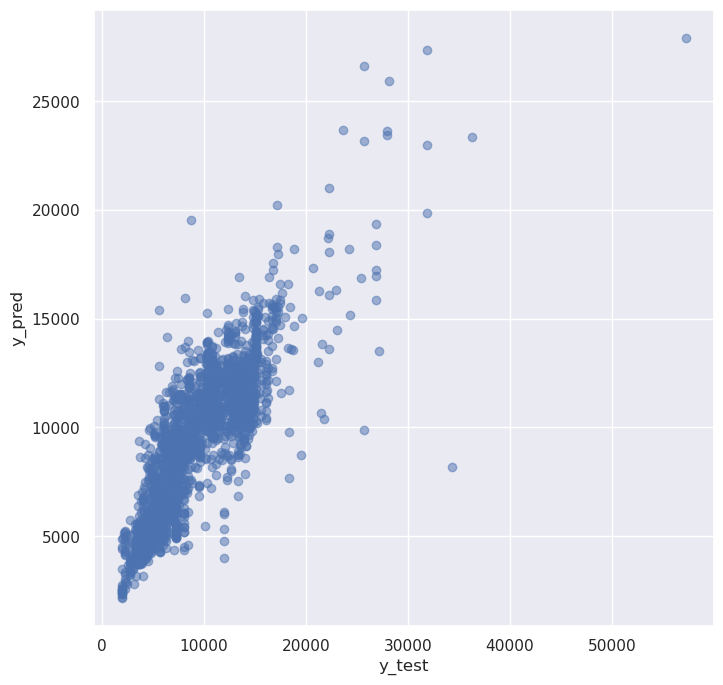

In [216]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [218]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1696.4963259126662
MSE: 6147966.331509952
RMSE: 2479.509292483082
